In [ ]:
# from keras.preprocessing import image

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# data_generator = ImageDataGenerator(rescale=1./255)

In [1]:
import matplotlib.pyplot as plt

In [2]:
# train_generator = data_generator.flow_from_directory(
#     "C:\\Users\\subak\\jupyter\\20210503_project\\data_waffle",
#     target_size=(100, 100),
#     batch_size=1,
#     class_mode='categorical')

In [3]:
import cv2
cv2.__version__

'3.4.2'

In [4]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2
mypath="C:\\Users\\USER\\data_waffle"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images_waffle = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_waffle[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)
import glob    
for i in range(len(images_waffle)):
    b, g, r = cv2.split(images_waffle[i])
    images_waffle[i] = cv2.merge([r, g, b])

In [5]:
mypath="C:\\Users\\USER\\data_macarons"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
images_macarons = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_macarons[n] = cv2.imread(join(mypath, onlyfiles[n]), cv2.IMREAD_COLOR)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


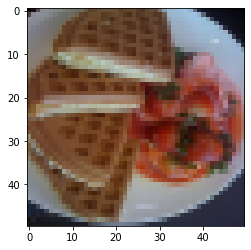

In [6]:
waffle_reshape = images_waffle
for i in range(len(images_waffle)):
    waffle_reshape[i] = cv2.resize(images_waffle[i], dsize=(50, 50), interpolation=cv2.INTER_AREA)

# plt.imshow(waffle_reshape[1])

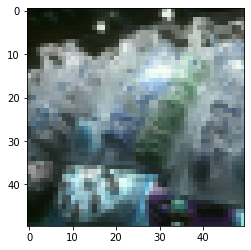

In [7]:
macarons_reshape = images_macarons
for i in range(len(images_macarons)):
    macarons_reshape[i] = cv2.resize(images_macarons[i], dsize=(50, 50), interpolation=cv2.INTER_AREA)

# plt.imshow(macarons_reshape[1])


In [8]:
waffle_train = waffle_reshape[:800]
waffle_test = waffle_reshape[800:]
print(len(waffle_test))

200


In [9]:
macarons_train = macarons_reshape[:800]
macarons_test = macarons_reshape[800:]
print(len(macarons_test))

200


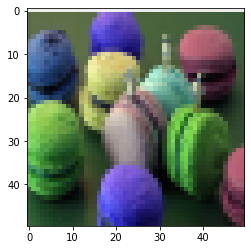

In [10]:
import numpy as np
train_data = np.concatenate((waffle_train, macarons_train))
test_data = np.concatenate((waffle_test, macarons_test))
# plt.imshow(test_data[379])

In [11]:

train_label = [True for _ in range(800)] + [False for _ in range(800)]
test_label = [True for _ in range(200)] + [False for _ in range(200)]
train_label_np = np.asarray(train_label)
test_label_np = np.asarray(test_label)
train_data_np = np.asarray(train_data)
test_data_np = np.asarray(test_data)

In [12]:
train_data_np_f = np.asarray([dataset.flatten() for dataset in train_data_np])
test_data_np_f = np.asarray([dataset.flatten() for dataset in test_data_np])
# print(test_label_np)

In [13]:
# import pandas as pd
# train_data_np_f_pd = pd.DataFrame(train_data_np_f)
# train_data_np_f_pd

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,12,8,1,4,4,1,3,5,0,3,...,129,62,90,60,85,108,101,104,124,133
1,7,2,4,22,13,17,86,77,84,140,...,61,38,39,60,37,38,61,38,37,61
2,14,17,24,13,16,23,18,19,26,39,...,24,79,33,26,83,36,28,81,36,29
3,40,45,64,41,49,73,63,59,71,71,...,51,96,56,28,136,98,62,133,86,37
4,74,47,36,74,47,36,75,48,37,77,...,113,107,105,115,113,111,121,108,106,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,9,15,24,7,12,21,6,11,18,4,...,26,11,17,21,10,15,20,7,14,21
1596,5,5,11,5,5,11,6,6,11,5,...,242,163,245,243,183,245,244,190,236,236
1597,61,149,208,57,147,210,51,145,209,50,...,217,201,213,220,202,213,220,185,200,211
1598,5,7,7,5,7,7,4,6,6,4,...,31,42,33,30,42,34,30,41,33,30


In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(train_data_np_f, train_label_np)
sgd_pred=sgd_clf.predict(test_data_np_f)
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(test_label_np,sgd_pred)))

예측 정확도: 0.9325


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_data_np_f, train_label_np, cv=3, scoring="accuracy")
# from sklearn.metrics import accuracy_score
# print('예측 정확도: {0:.4f}'.format(accuracy_score(test_label_np,pred)))

array([0.97565543, 0.96998124, 0.98123827])

In [25]:
# for i in range(400):
#     print(i, sgd_clf.predict([test_data_np_f[i]]))
from sklearn.metrics import mean_squared_error

In [160]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [161]:
dt_clf.fit(train_data_np_f, train_label_np)

DecisionTreeClassifier(random_state=42)

In [162]:
pred = dt_clf.predict(test_data_np_f)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(test_label_np,pred)))

예측 정확도: 0.8775


In [163]:
dt_clf_cross=cross_val_score(dt_clf, train_data_np_f, train_label_np, cv=3, scoring="accuracy")
dt_clf_cross


array([0.87078652, 0.85365854, 0.86116323])

In [164]:
from graphviz import Source
from graphviz import render

from sklearn.tree import export_graphviz
import os
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "desert_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "d_images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
export_graphviz(
        dt_clf,
        out_file=os.path.join(IMAGES_PATH, "desert_tree.dot"),
# #         feature_names=iris.feature_names[2:],
        class_names=['True','False, NONE'],
        rounded=True,
        filled=True
    )

gr=Source.from_file(os.path.join(IMAGES_PATH, "desert_tree.dot"))



In [165]:

gr.render('test3', view=True)  

'test3.pdf'

In [54]:
# plot_decision_regions(test_data_np_f, test_label_np, dt_clf)

In [59]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
# from sklearn.neural_network import MLPClassifier


In [67]:
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
# mlp_clf = MLPClassifier(random_state=42)

In [69]:
estimators = [random_forest_clf, dt_clf, svm_clf, sgd_clf]

for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(train_data_np_f, train_label_np)

Training the RandomForestClassifier(random_state=42)
Training the DecisionTreeClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the SGDClassifier(random_state=42)


In [70]:
[estimator.score(test_data_np_f, test_label_np) for estimator in estimators]

[0.9675, 0.8775, 0.96, 0.9325]

In [145]:
from sklearn.ensemble import VotingClassifier
named_estimators = [
    ("random_forest_clf", random_forest_clf),
    ("decision_trees_clf", dt_clf),
    ("svm_clf", svm_clf),
    ("sgd_clf", sgd_clf),
]
voting_clf = VotingClassifier(named_estimators)

In [146]:
voting_clf.fit(train_data_np_f, train_label_np)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('decision_trees_clf',
                              DecisionTreeClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('sgd_clf', SGDClassifier(random_state=42))])

In [147]:
[estimator.score(test_data_np_f, test_label_np) for estimator in voting_clf.estimators_]

[0.9675, 0.8775, 0.96, 0.9325]

In [175]:
 voting_clf.set_params(decision_trees_clf=None)

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('decision_trees_clf', None),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('sgd_clf', SGDClassifier(random_state=42))])

In [176]:
voting_clf.score(test_data_np_f, test_label_np)

0.9725

In [135]:
voting_clf.voting = "soft"

In [150]:
# voting_clf.score(test_data_np_f, test_label_np)

In [174]:
voting_clf

VotingClassifier(estimators=[('random_forest_clf',
                              RandomForestClassifier(random_state=42)),
                             ('decision_trees_clf',
                              DecisionTreeClassifier(random_state=42)),
                             ('svm_clf',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('sgd_clf', SGDClassifier(random_state=42))])